In [1]:
#parameters for trying

lambda<-1.4
k<-1:20

## Point 1.1

In [2]:
#definition of the probability density function

dtruncpois <- function(k,lambda){
    return (((lambda**k)*(exp(-lambda)))/((factorial(k))*(1-(exp(-lambda)))))
}

In [3]:
#definition of the cumulative probability distribution

ptruncpois <- function(k,lambda){
    y<-dtruncpois(k,lambda)
    yp<-rep(0,length(y))
    for (i in 1:length(yp)){
        yp[i]<-sum(y[1:i])
    }
    return (yp)
}

## Point 1.2

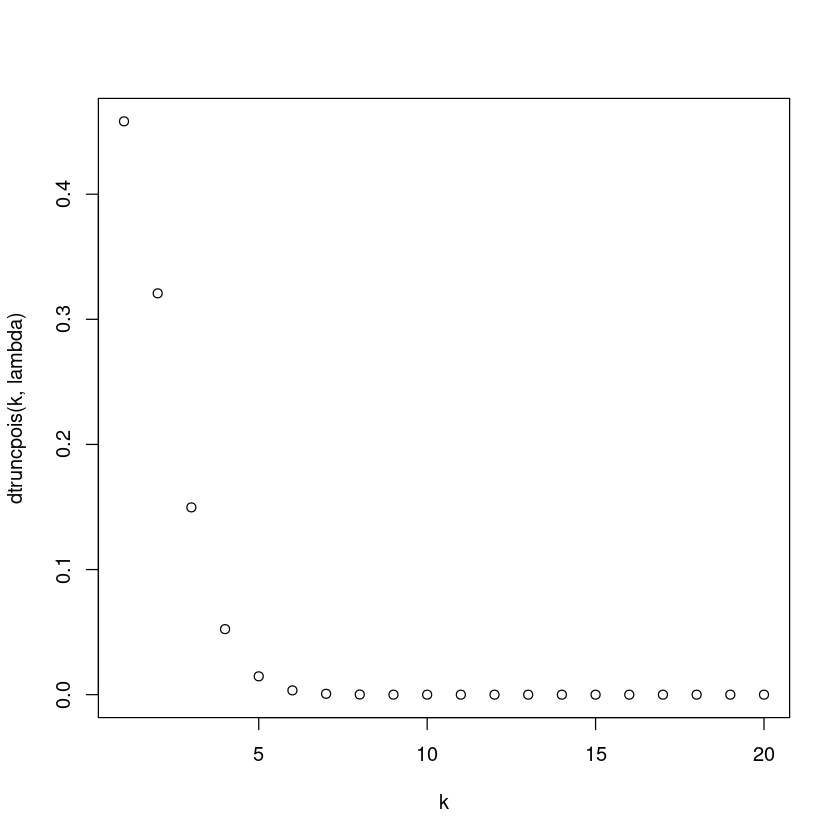

In [4]:
#plot density function

plot(k,dtruncpois(k,lambda))

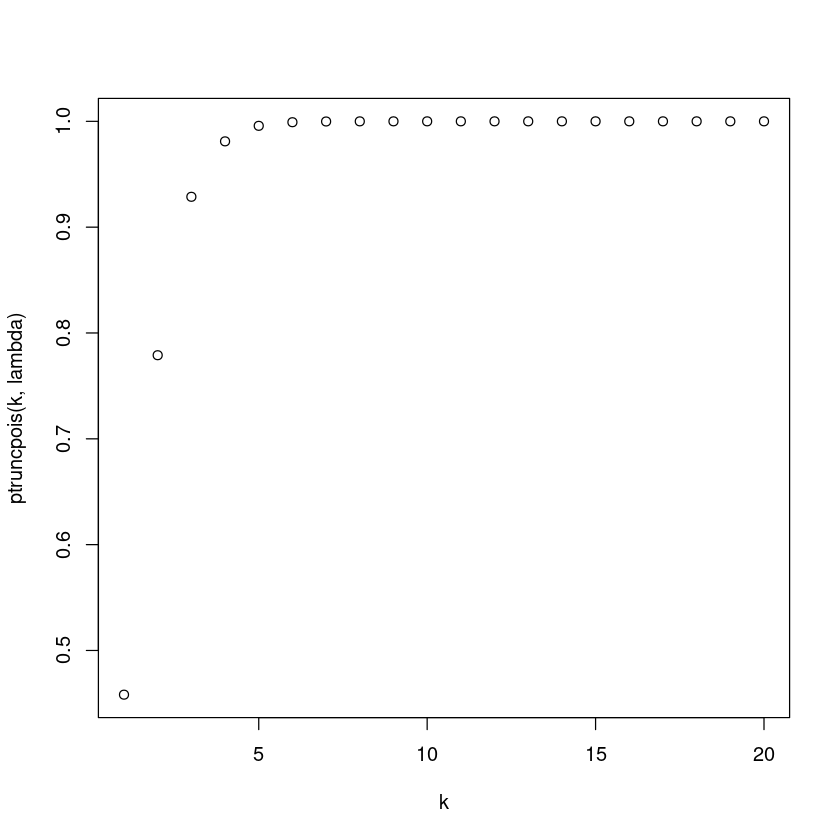

In [5]:
#plot cumulative distribution

plot(k,ptruncpois(k,lambda))

## Point 1.3

In [6]:
#calculating the mean

k_mean<-sum(k*dtruncpois(k,lambda))
k_mean

[1] 1.858235

In [7]:
#calculating the variance

k_variance<-sum((k**2)*dtruncpois(k,lambda))-sum(k*dtruncpois(k,lambda))**2
k_variance

[1] 1.006726

## Point 1.4

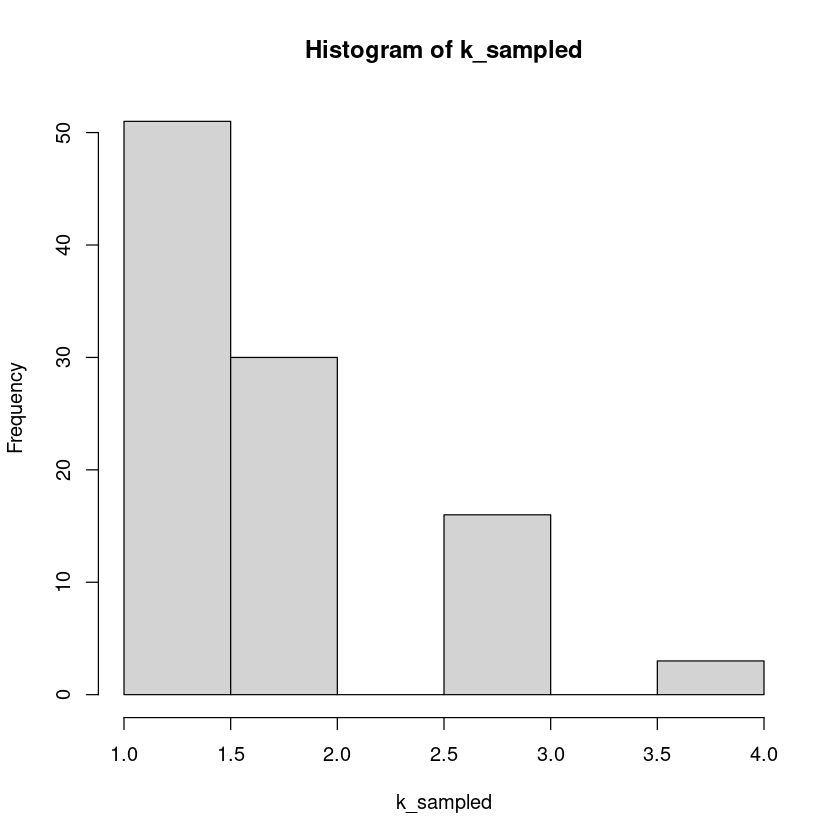

In [8]:
#sampling k according to the distribution

k_sampled<-sample(1:10,100, replace=T, prob=dtruncpois(1:10,lambda))
hist(k_sampled)

In [9]:
sample_mean<-mean(k_sampled)
sample_mean

[1] 1.71

## Point 2.a

In [10]:
#definition of unnormalized function

p_muons_notnorm <- function(E){
    E0<-7.25
    gamma<-2.7
    p<-ifelse(E<E0,1,(E-E0+1)**(-gamma))
    return (p)
}

In [11]:
#finding of N

N<-1/integrate(p_muons_notnorm,0,Inf)$value
N

[1] 0.1275797

In [12]:
#definition of normalized function

p_muons_norm <- function(E){
    N<-0.127579703198913
    p<-N*p_muons_notnorm(E)
    return (p)
}

## Point 2.b

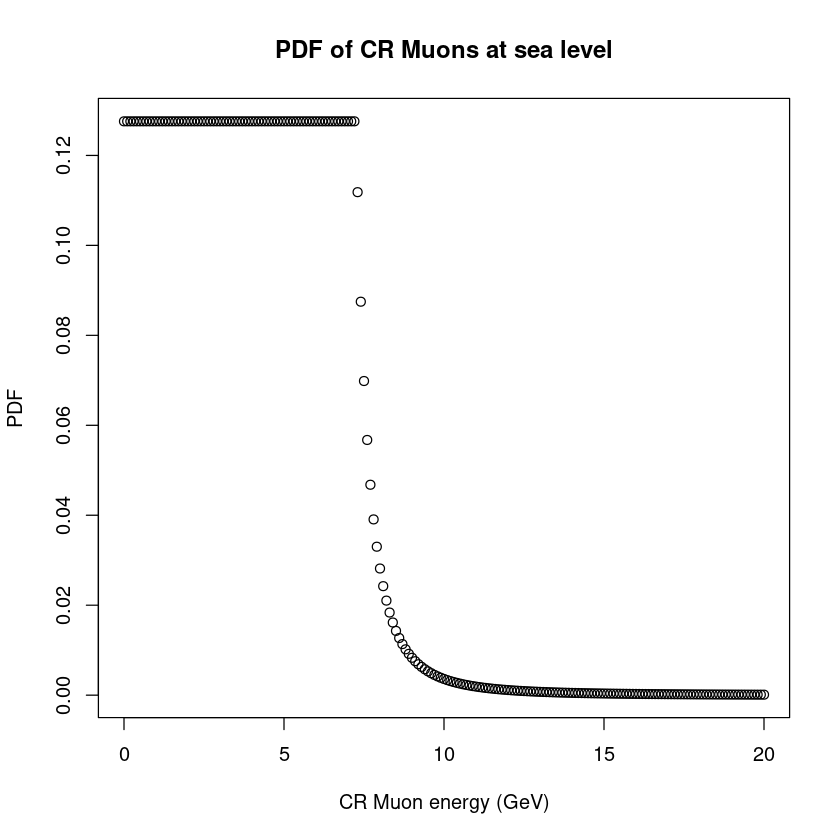

In [13]:
#plotting the probability density function

x_values <- seq(from = 0, to = 20, by = 0.1)

y_values <- p_muons_norm(x_values)

plot(x_values, y_values, xlab = "CR Muon energy (GeV)", ylab = "PDF", main = "PDF of CR Muons at sea level")


## Point 2.c

In [14]:
# cumulative distr function

cumsum_p_muons_norm <- function(E){
    y<-p_muons_norm(E)
    yp<-rep(0,length(y))
    for (i in 1:length(yp)){
        yp[i]<-sum(y[1:i])*(E[i+1]-E[i])
    }
    return (yp)
}

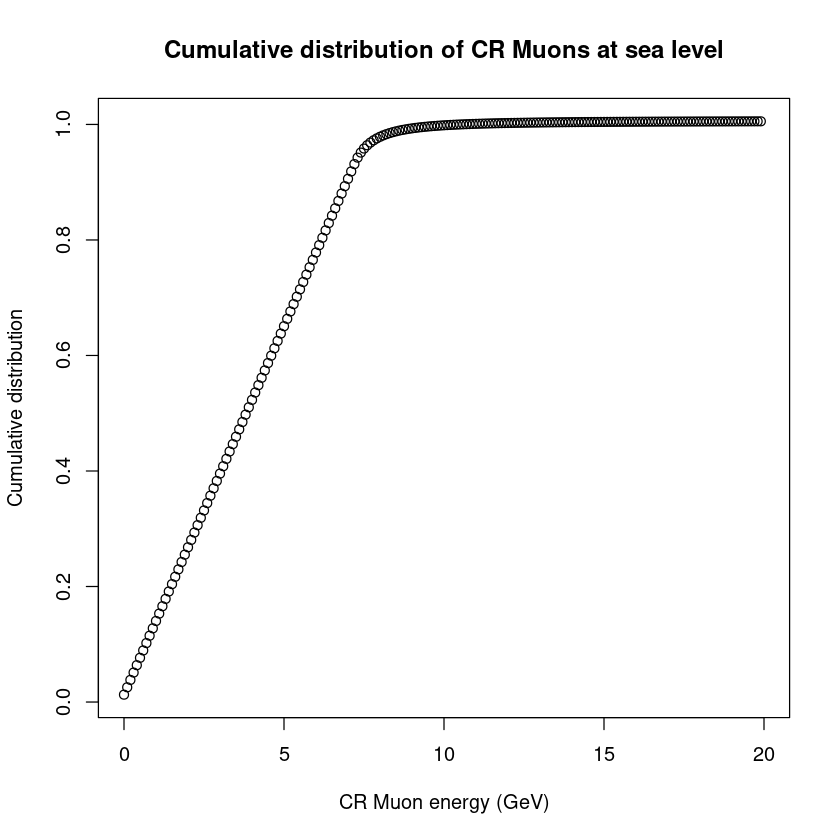

In [15]:
x_values = seq(from=0,to=20, by=0.1)

y_values = cumsum_p_muons_norm(x_values)

plot(x_values, y_values, xlab = "CR Muon energy (GeV)", ylab = "Cumulative distribution", main = "Cumulative distribution of CR Muons at sea level")

## Point 2.d

In [16]:
#calculating mean x value

x<-seq(0,20,0.1)
weighted_x<-function(x){
    return (x*p_muons_norm(x))
}
x_mean<-integrate(weighted_x,0,Inf)$value
x_mean

[1] 4.004251

## Point 2.e

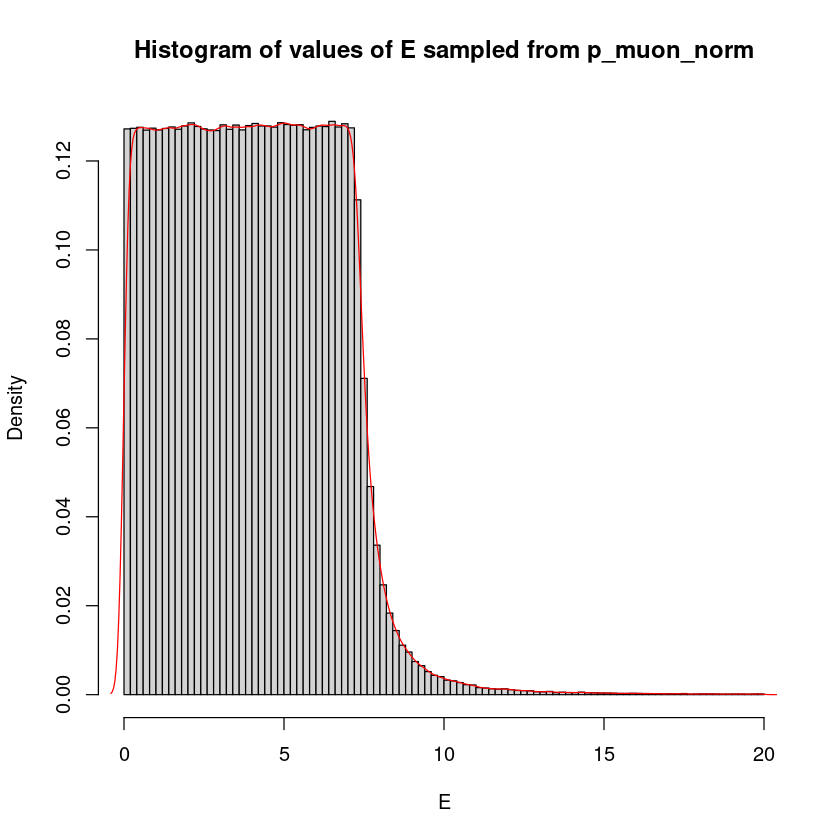

In [17]:
#generate 10^6 random numbers from this distr and make a hist

E<-sample(seq(0, 20, length.out = 1000),10^6,replace=T, prob=p_muons_norm(seq(0, 20, length.out = 1000)))
hist(E,breaks=100,freq=FALSE, main="Histogram of values of E sampled from p_muon_norm")
lines(density(E),col="red")

## Point 3.a

For a random variable $X$ with mean $E(X)$, a bound for the probability of the variable taking at least a value of $a$ is given by Markov's Inequality:
$\newline P(X \ge a) \le \frac{E(X)}{a}\newline$
Therefore, the probability of at least 5 accidents happening is:
$\newline P(X \ge 5) \le \frac{2}{5}$

## Point 3.b

In [18]:
# use comulative distribution to get the actual probability

a<-5
mean<-2

prob<- 1-ppois(a-1,mean)
prob

#0.05 is, in fact, lower than 0.4 so the inequality holds, even if not very precise

[1] 0.05265302

## Point 3.c

Chebyschev's formula states that, for a random variable of mean $\mu$ with finite non-zero variance $\sigma^{2}$:

$\newline P(|X - \mu| \geq k\sigma) \leq \frac{1}{k^2}\newline$

In our case we want $P(|X - \mu| \geq 3) \rightarrow k\sigma=3 \rightarrow k=\frac{3}{\sigma}=\frac{3}{\sqrt{2}}\newline$

So then $P(X \ge 5) \le \frac{1}{(\frac{3}{\sqrt{2}})^2}=\frac{2}{9}=0.22222\newline$

This result is also in accordance with the actual probability of having 5 accidents, and a bit more accurate

## Point 4

The question doesn't say what type of distribution does the waiting time follow.
If we do not suppose a distribution we can try using the Chebyschev formula seen before.

$\newline P(|X - \mu| \geq k\sigma) \leq \frac{1}{k^2} \newline$

We want to find the $X$ that ensures that $\frac{1}{k^2} \le 5\%$

$\newline \frac{1}{k^2} \le 0.05 \rightarrow k \ge 2\sqrt{5} \rightarrow k\sigma=2k=4\sqrt{5} \approx 9 \rightarrow X\approx 9+\mu = 16\newline$

So we should order the book 16 days before if we want 95% certainty that it arrives in time. Of course, as we've seen before, this is an overestimation. If we suppose a normal distribution we can calculate precisely:

[1] 0.02275013 0.06680720 0.15865525 0.30853754 0.50000000 0.69146246 0.84134475
[8] 0.93319280 0.97724987

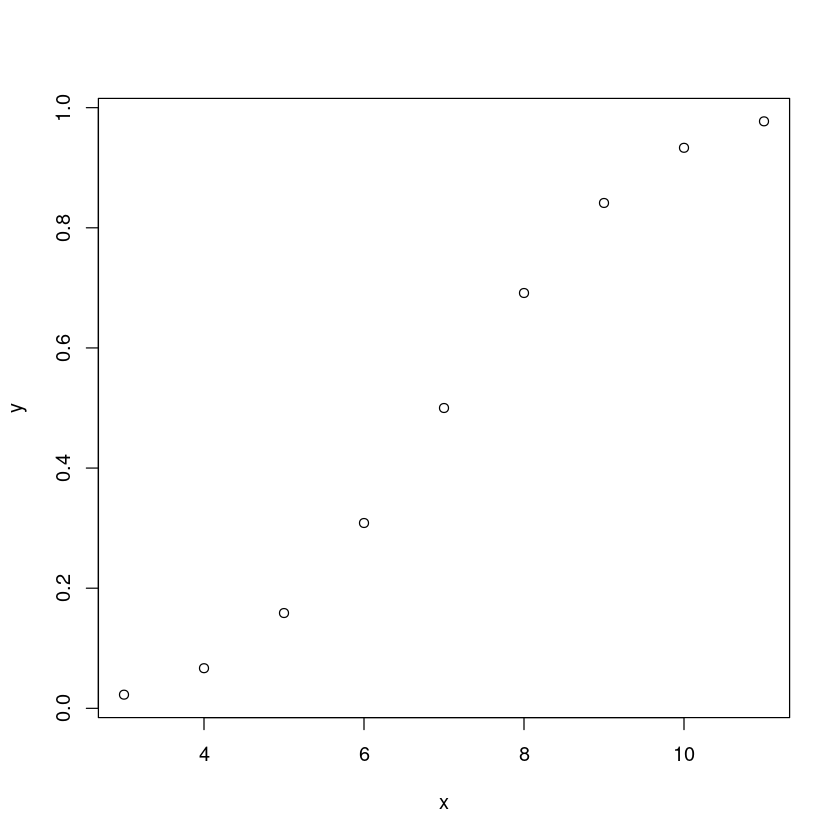

In [19]:
mean <- 7
std <- 2


x<-seq(mean-4,mean+4)
y<-pnorm(x,7,2)
plot(x,y)
y

#from the values found we can see that if we order at day 1, at day 8 we have a 93,3% chance of having the book, at day 9 we have a 97,7%

## Point 5

We define $X_{i} = 1$ if the i-th red card is paired with a black card, $X_{i} = 0$ otherwise. We want to find an upper limit to $P(\sum_{i=1}^{26}{X_{i}}\le 10)$. To do this we need to transform it in the form of a Chebyshev formula: 

$ \newline P(|X - \mu| \geq k\sigma) \leq \frac{1}{k^2}\newline $ 

We need to find the average value and standard deviation of $X_{i}$.

For each red card, the 2 cases (red-red and red-black) are almost equiprobable: the expectation value of $X_{i}$ is $\frac{26}{51}=0.5098$ and the average of $X=\sum_{i=1}^{26}{X_{i}}\quad$ is $\quad0.5098 \cdot 26 = 13.2548$. We get its variance as $E[X_{i}]-E[X_{i}]^{2} = 0.2499\quad$ which makes the variance of $X\quad 26\cdot 0.2499=6.4974\newline$

We can now write $P(X\le 10) = P(X-13.2548 \le -3.2548) = P(|X-\mu| \ge 3.2548)\rightarrow 3=k\sigma\rightarrow k=\frac{3.2548}{\sigma}=\frac{3.2548}{\sqrt{6.4974}}\approx1.277\newline$

$P(X\le 10)\le \frac{1}{k^{2}} = \frac{1}{1.277^{2}}=0.61 \%$

## Point 6.a

In [20]:
# we can use the cumulative distribution of a poisson process

expected_num <- function(minutes){
    rate<-1/30
    return (minutes*60*rate)
}

prob_more_than_6 <- 1 - ppois(6, expected_num(2))
prob_more_than_6
prob_less_than_4 <- ppois(3,expected_num(3))
prob_less_than_4

[1] 0.110674

[1] 0.1512039

## Point 6.b

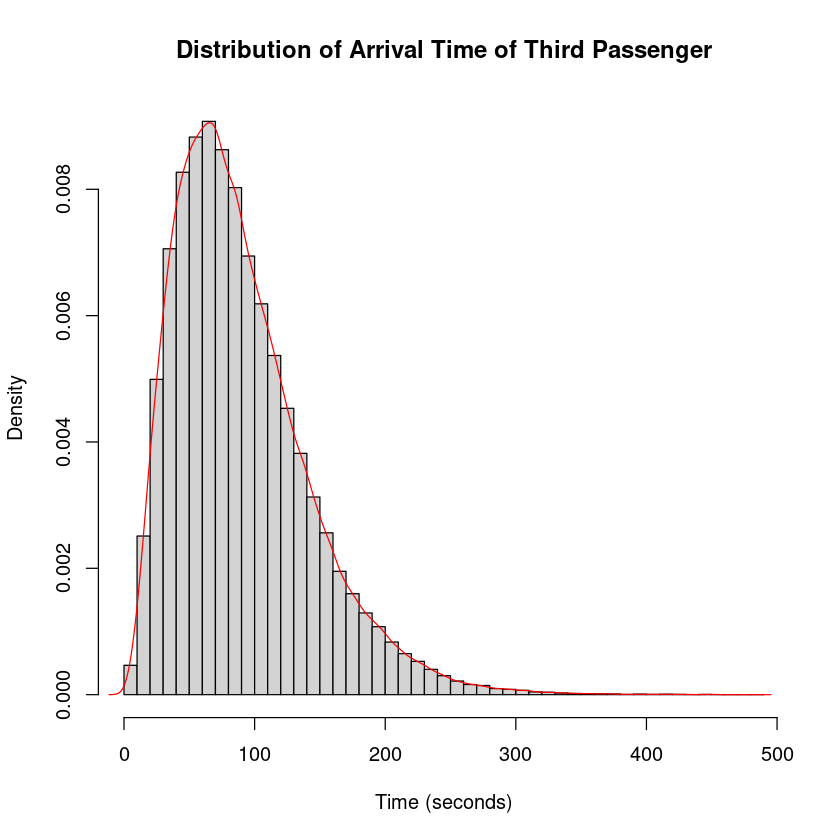

In [21]:
num_passenger <- 3
rate <- 1/30  
reps <- 10000

simulate_arrival_time <- function() {
    times <- rexp(num_passenger, rate = rate)  # the exp distr simulates times between events of a poisson distributed event
    return(sum(times))
}

arrival_times <- replicate(100000, simulate_arrival_time())

hist(arrival_times, breaks = 50, freq = FALSE, main = "Distribution of Arrival Time of Third Passenger", xlab = "Time (seconds)")
lines(density(arrival_times),col="red")

## Point 6.c

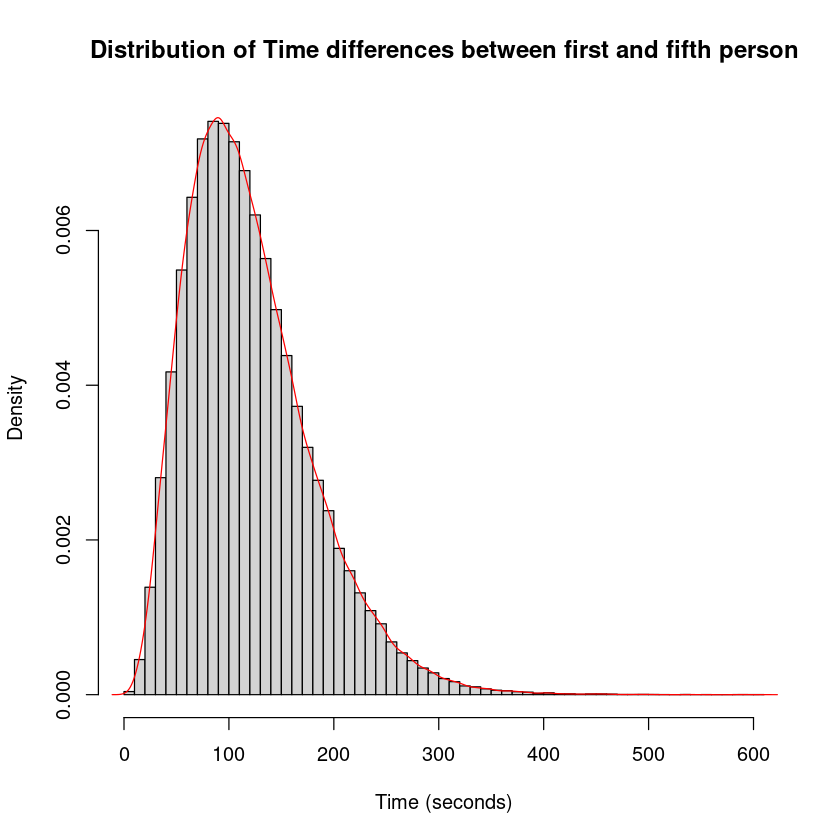

In [22]:
simulate_difference <- function() {
    times <- rexp(5, rate=rate)
    return(sum(times)-times[1])
}

differences <- replicate(100000,simulate_difference())

hist(differences, breaks = 50, freq=FALSE, main = "Distribution of Time differences between first and fifth person", xlab = "Time (seconds)")
lines(density(differences),col="red")